In [1]:
#For an image classification challenge, create and train a ConvNet in Python using TensorFlow. Also try to improve the performance of the model by applying various hyper parameter tuning to reduce the overfitting or under fitting problem that might occur. Maintain graphs of comparisons.

C:\Users\bhagy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8627 - loss: 0.4522 - val_accuracy: 0.9790 - val_loss: 0.0694 - learning_rate: 0.0010
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9813 - loss: 0.0586 - val_accuracy: 0.9885 - val_loss: 0.0420 - learning_rate: 0.0010
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9820 - val_loss: 0.0526 - learning_rate: 0.0010
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9865 - val_loss: 0.0447 - learning_rate: 0.0010
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9956 - loss: 0.0162 - val_accuracy: 0.9908 - val_loss: 0.0325 - learning_rate: 5.0000e-04
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9975 - loss: 0.0094 - val_accuracy: 0.9907 - val_loss: 0.0359 - learning_rate: 5.0000e-04
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.

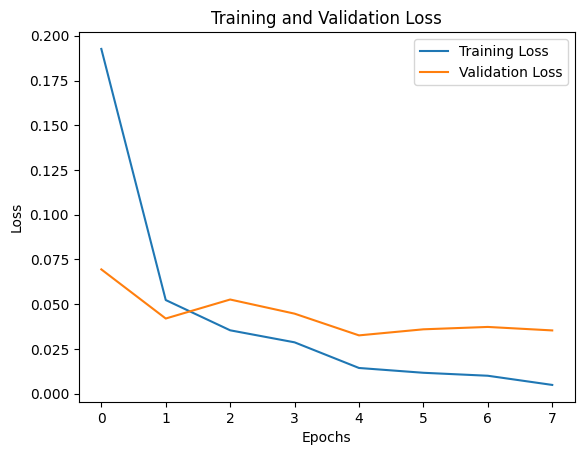

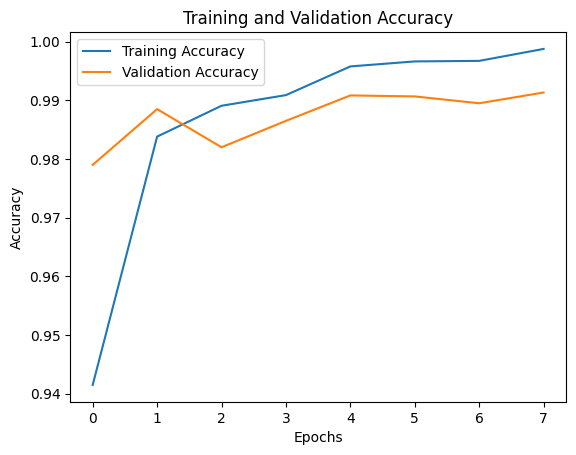

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to have a single channel (grayscale) and add a channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define the ConvNet architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks for early stopping and learning rate scheduling
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, min_lr=0.00001)
]

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
